#Importing Libraries
Importing necessary libraries for the project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Data Exploration
Reading the dataset. Printing its head, shape, info, null values and duplicates. Also describing the dataset.

In [3]:
# Step 1: Load the Dataset
df = pd.read_csv('E_Commerce.csv')
print("First 5 rows of the dataset:")
display(df.head())
print(df.shape)
df.info()
df.describe()
df.isnull().sum()
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

(10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
Number of duplicate rows: 0


Dataset Information
Total Rows: 10,999
Total Columns: 12
Data Types:
8 Numerical Columns (int64)
4 Categorical Columns (object)

After checking for missing data using df.isnull().sum(), no missing values were found in any of the columns. This indicates that the dataset is complete and doesn't require imputation or deletion of rows for handling missing data.

I checked for duplicate rows using df.duplicated().sum() and found 0 duplicate rows. Thus, no rows were removed from the dataset in this step.

#Encoding Categorical Data

In [4]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_cols])
print("Shape of encoded array:", encoded_array.shape)
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names)
df_encoded = pd.concat([df.drop(categorical_cols, axis=1).reset_index(drop=True), encoded_df], axis=1)

df_encoded.head()

Shape of encoded array: (10999, 9)


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,4,5,216,2,59,3088,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,3,2,2,183,4,48,3374,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,3,3,176,4,10,1177,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,5,2,2,184,3,46,2484,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In this step, I first selected and printed the categorical columns then I used one hot encoder to encode them. One-Hot Encoding is a method to convert categorical data into numerical form by creating new columns one for each unique category filled with 0s and 1s.

In [5]:
df_encoded.to_csv('E_Commerce_Encoded.csv', index=False)

#Data Visualization


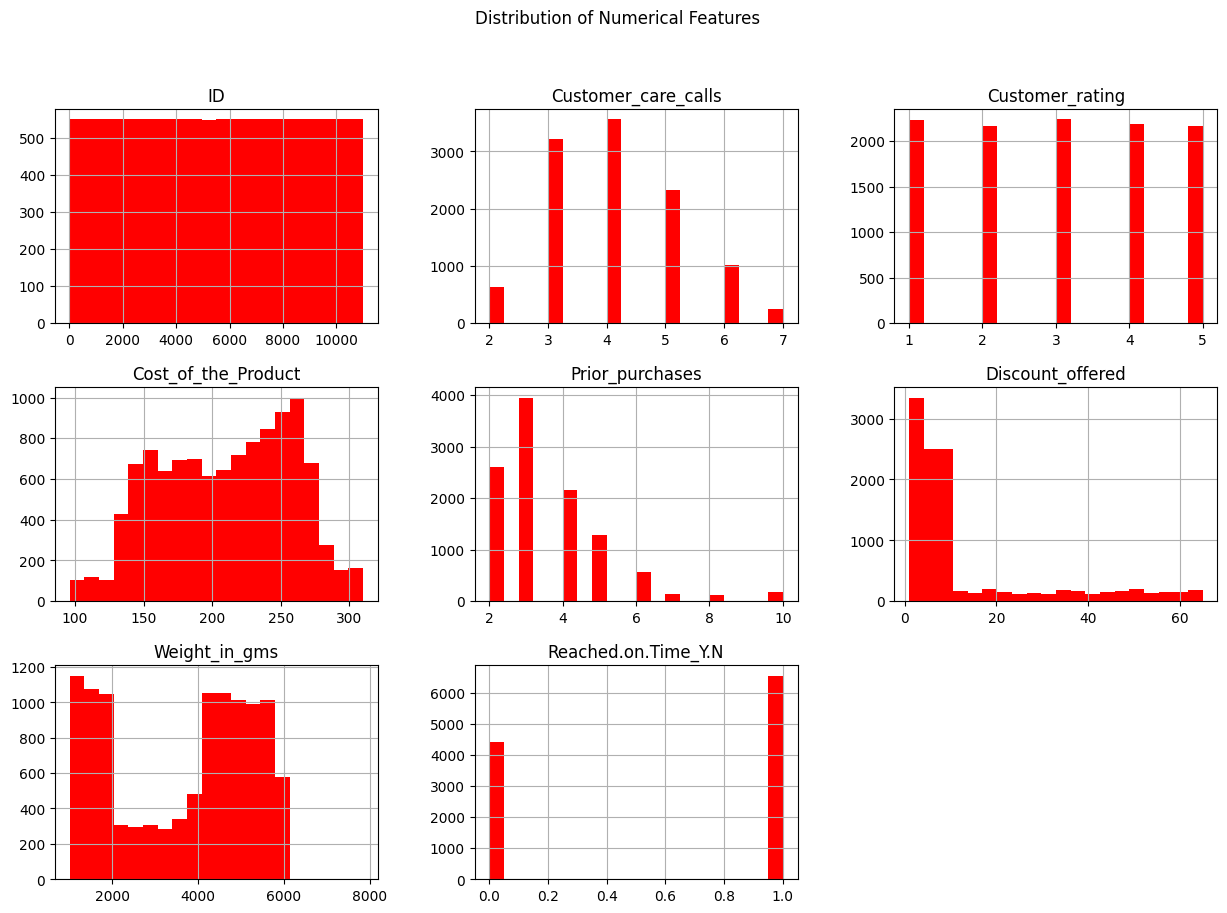

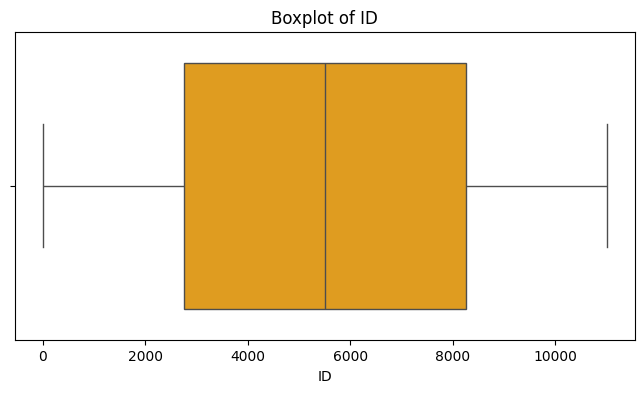

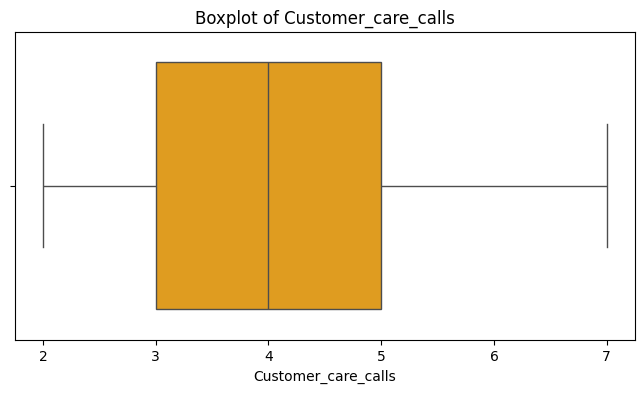

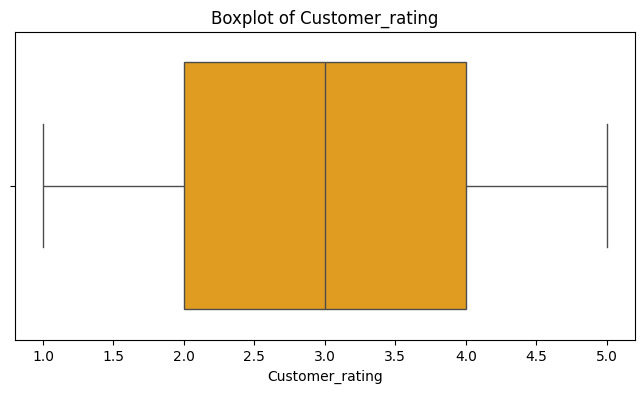

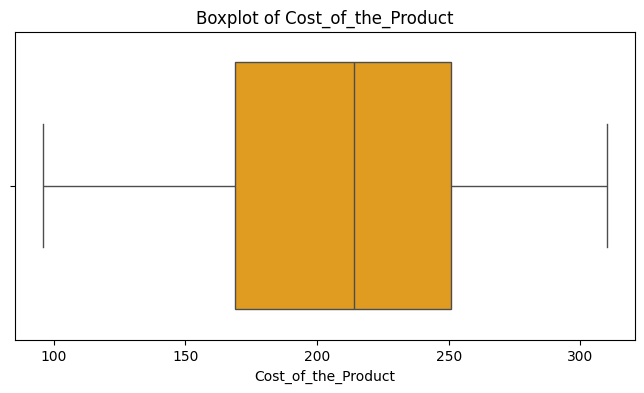

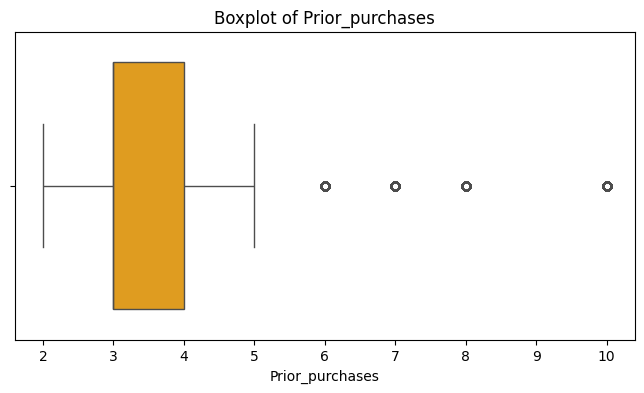

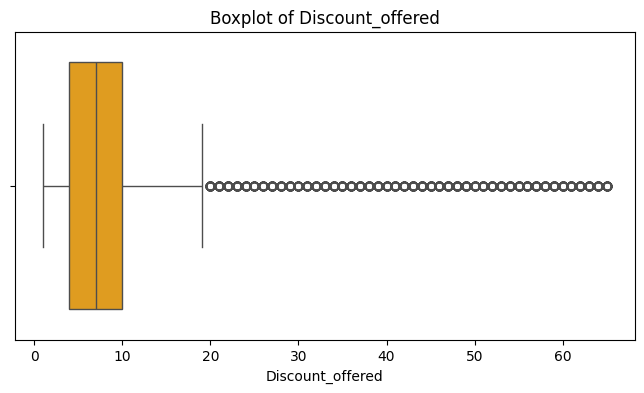

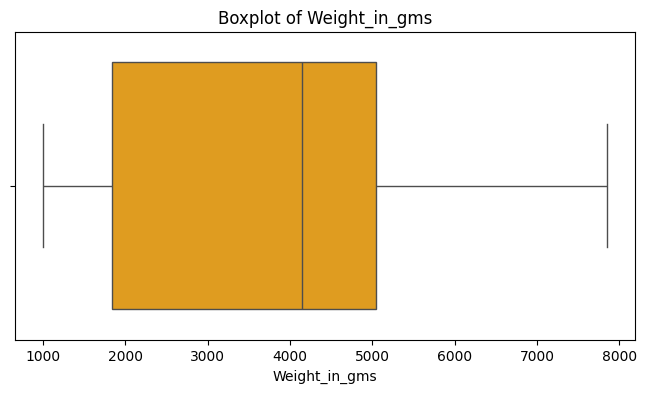

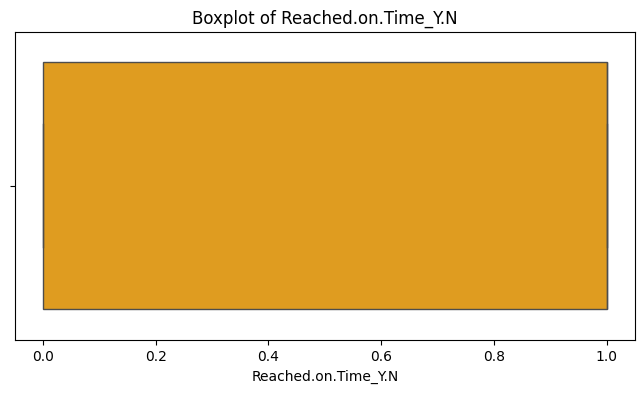

In [6]:
df_en = pd.read_csv('E_Commerce.csv')

numerical_cols = df_en.select_dtypes(include=['int64', 'float64']).columns
df_en[numerical_cols].hist(figsize=(15, 10), bins=20, color='red')
plt.suptitle('Distribution of Numerical Features')
plt.show()
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_en[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

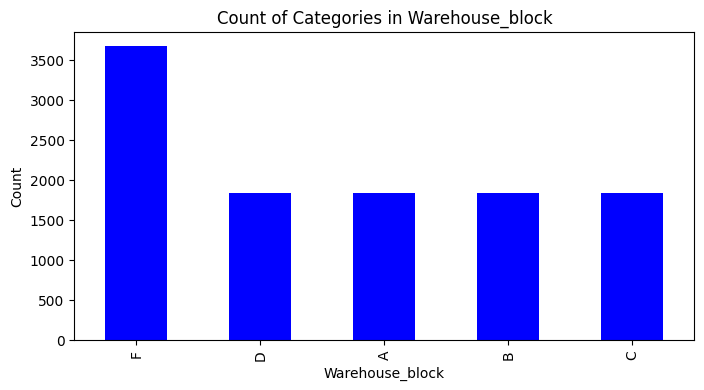

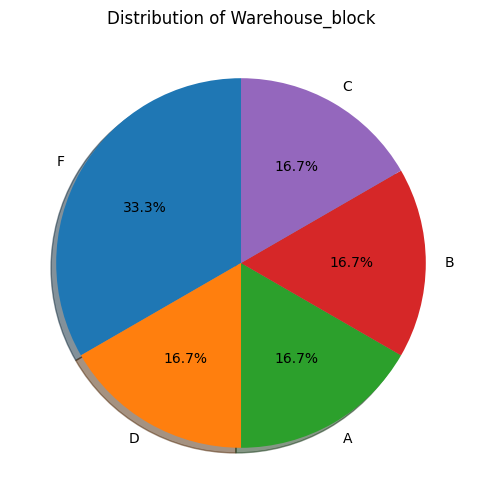

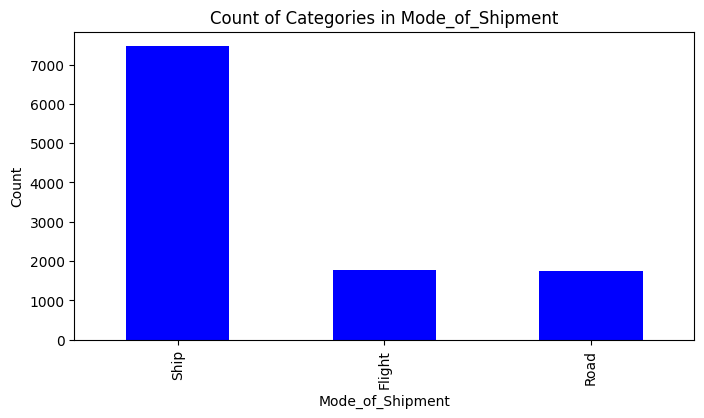

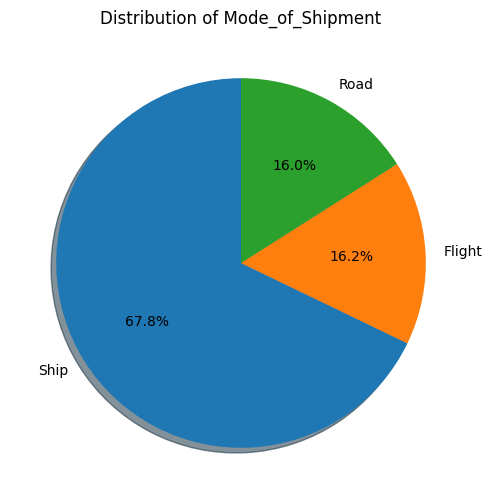

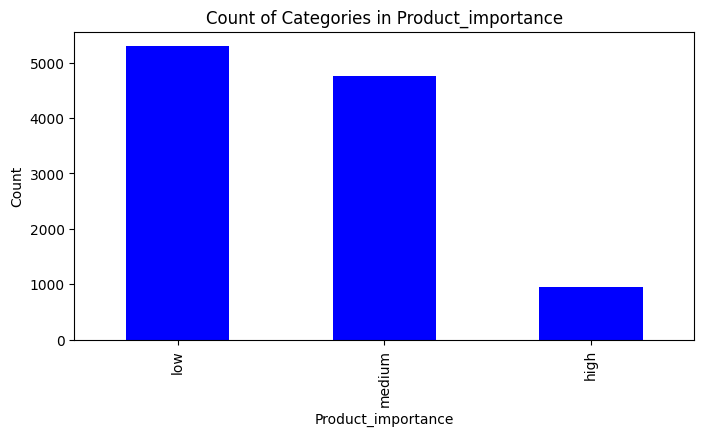

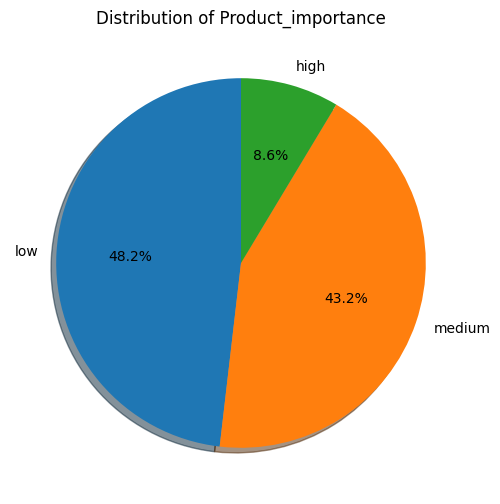

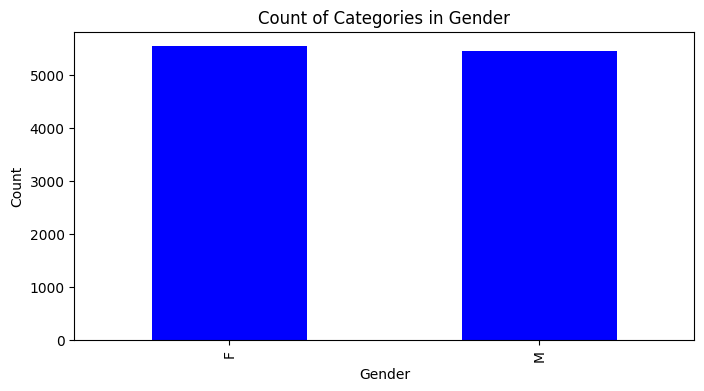

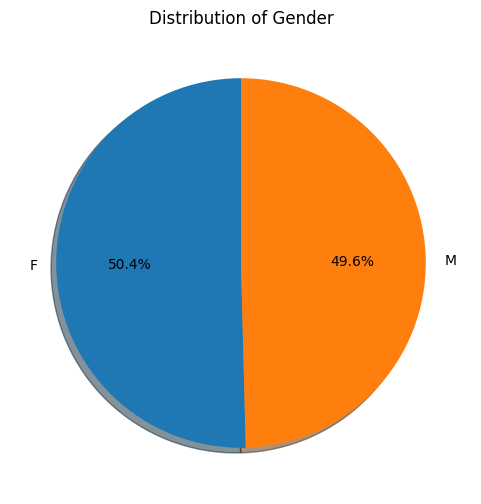

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Count of Categories in {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()
    if df[col].nunique() <= 8:
        plt.figure(figsize=(6, 6))
        df_en[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
        plt.title(f'Distribution of {col}')
        plt.ylabel('')
        plt.show()


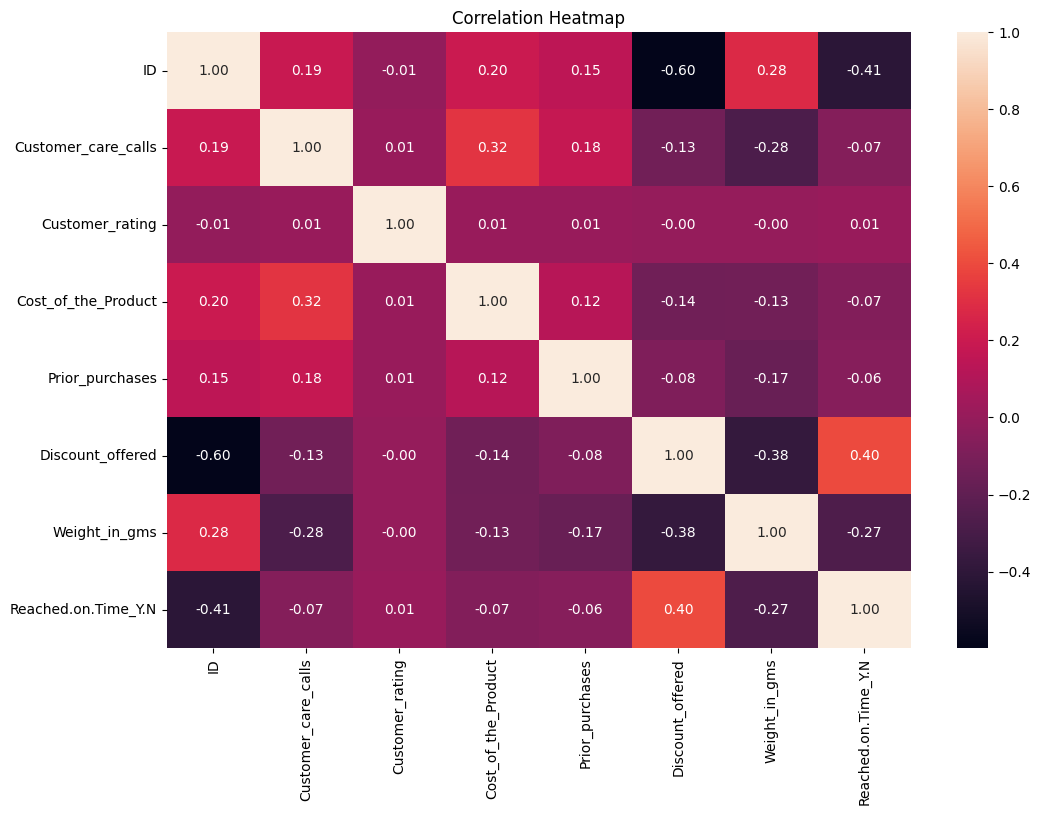

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df_en[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


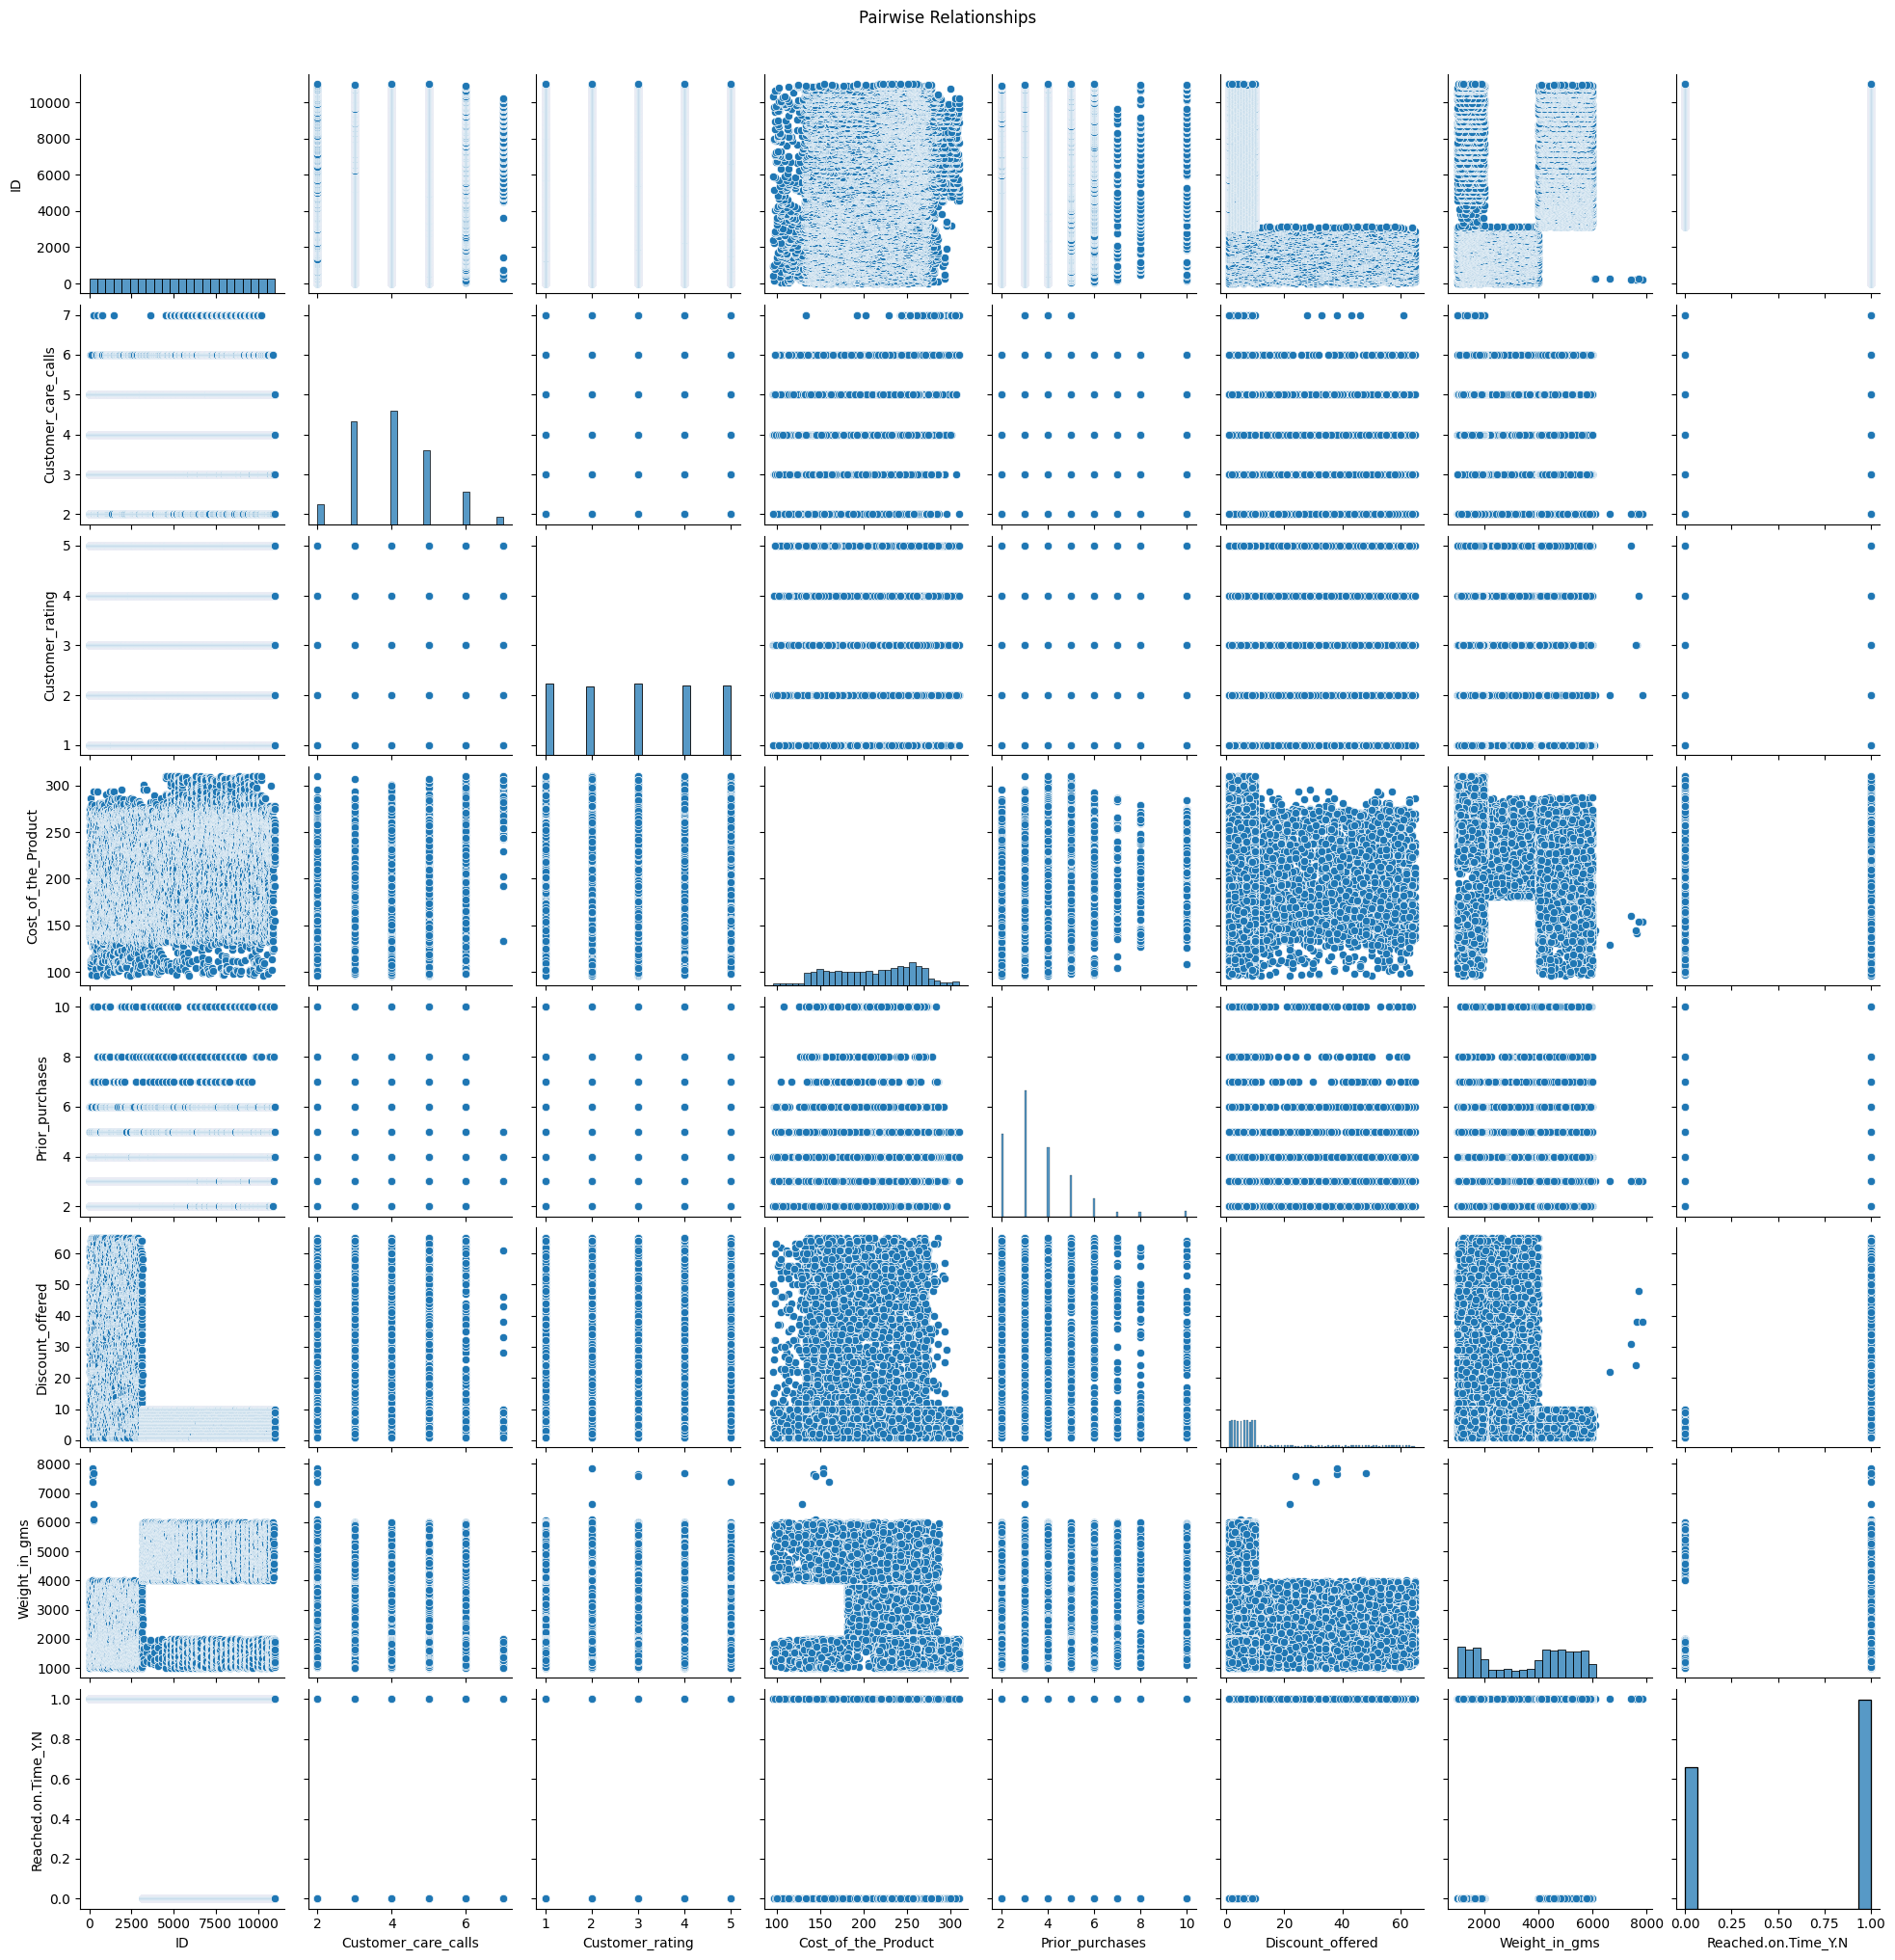

In [9]:
sns.pairplot(df_en[numerical_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

Splitting and Feature Scaling

In [10]:
X = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_encoded['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Model

In [11]:
lr = LogisticRegression(max_iter=1500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.6518181818181819

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58       895
           1       0.71      0.69      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200


Confusion Matrix:
 [[531 364]
 [402 903]]


Decision Tree Model

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.639090909090909


Random Forest Model

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.6831818181818182


#Hypertuning

1. GridSearchCV

GridSearchCV performs an exhaustive search over a grid of possible hyperparameter combinations. It tries every single combination of the specified parameters. After evaluating all combinations using cross-validation (CV), it selects the set of parameters that performs the best.

We use it:

 -> When the parameter grid is small.

 -> When time is not a constraint and you want to try all combinations for the best result.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best Accuracy (GridSearchCV):", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (GridSearchCV): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy (GridSearchCV): 0.6866701121504988
Test Accuracy: 0.6909090909090909
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       895
           1       0.97      0.49      0.65      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.81      0.69      0.68      2200



2. RandomizedSearchCV

RandomizedSearchCV randomly samples a given number (n_iter) of combinations from the parameter distributions. It does NOT try all possible combinations, only a random subset. Much faster for large parameter spaces.

We use it when :

 -> We have a large search space.

 -> We want a quick good-enough solution rather than the absolute best.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10)
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=30, cv=5,
                                   scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

random_search.fit(X_train, y_train)

print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Accuracy (RandomizedSearchCV):", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (RandomizedSearchCV): {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 270}
Best Accuracy (RandomizedSearchCV): 0.6859883585715024
Test Accuracy: 0.6922727272727273
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       895
           1       0.98      0.49      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.81      0.69      0.68      2200



Conclusion:-

1. The dataset was clean—no missing or duplicate values.
2. Discount Offered and Weight had noticeable correlation with delivery delays.
3. Logistic Regression performed decently, but Random Forest gave the best accuracy.
4. Feature encoding helped make categorical variables usable in models.
5. Random Forest is recommended for this classification task based on higher accuracy and balanced performance across classes.